[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **CAP-394 – Introdução à Ciência de Dados (2022)**

**Professores:**
*Dr. Rafael Duarte Coelho Dos Santos e Dr. Gilberto Ribeiro De Queiroz*

**Aluno :**
*Lourenço José Cavalcante Neto*

---

**ATIVIDADE 01:  Análise básica do Dataset**

**Descrição da Atividade:**

1. Preparar o primeiro notebook contendo uma análise básica dos dados, demonstrando:
  * A estrutura dos dados;
  * Visualização básica dos dados;
  * etc...


# **Introdução**

A ciência de dados é a prática de mineração de grandes conjuntos de dados brutos, estruturados e não estruturados, para identificar padrões e extrair deles insights acionáveis. Este é um campo interdisciplinar, e os fundamentos da ciência de dados incluem estatísticas, inferência, ciência da computação, análise preditiva, desenvolvimento de algoritmos de aprendizado de máquina e novas tecnologias para obter insights de big data.

Para definir a ciência de dados e melhorar o gerenciamento de projetos de ciência de dados, comece com seu ciclo de vida. O primeiro estágio no fluxo de trabalho do pipeline de ciência de dados envolve a captura: adquirir dados, às vezes extraí-los e inseri-los no sistema. O próximo estágio é a manutenção, que inclui armazenamento de dados, limpeza de dados, processamento de dados, preparação de dados e arquitetura de dados.

Este notebook contém uma análise básica de dados, tal qual procurou-se demonstrar a sua estrutura,visualização básica etc. Para isso, foi selecionado um dataset no qual a sua origem é de um equipamento chamado **Disdrômetro RD80** (também chamado de **Joss**),instalado nas proximidades da torre **ATTO**, em um sítio chamado Campina, na região Amazônica. O disdrômetro RD80 mede a distribuição das gotas de chuva que chegam à superfície.


Este notebook pode ser acessado no **github**: https://github.com/lourencocavalcante/Introduction-to-Data-Science.git

# **Dataset**
 
Os Dados são de dois equipamentos instalados próximo à torre **ATTO**, em um sítio chamado Campina, na região amazônica. **Radiômetro de microondas MP3000A:** Este mede diversas variáveis: Ambiente, Radiância no espectro de onda do microonda em diversos canais e Estimativas de parâmetros de nuvens. 
**Disdrômetro RD80 (Joss):** Mede adistribuição das gotas de chuva que chegam à superfície;


<img src="https://github.com/lourencocavalcante/Introduction-to-Data-Science/blob/e47238ac99a525a4972b534bf9c4950ee85b1b89/Figuras/disdrometro-rd80.gif?raw=true" width = 500 align="left">


Os dois equipamentos estão instalados próximos à torre ATTO, em um sítio chamado Campina, na região amazônica;


Período de dados: De 17 de março de 2020 a 07 Julho 2022.

Obs.: Nesta primeira parte da análise somente os dados do **Disdrômetro RD80 (Joss)** serão utilizados.



```
level1_output_sfc
Neste arquivo estão os dados do ambiente próximo à superfície.
Mês, dia, Ano (YY), Hora, Minuto, segundos, Tamb(K), Rh(%), Pres(mb), Tir(K), Rain, DataQuality 
Tamb - Temperatura do Ambiente
Rh - Umidade Relativa
Pres - Pressão
Tir - Temperatura no canal Infravermelho

level1_output_bt
Neste arquivos estão os dados das medidas dos canais do microonda.
Mês, dia, Ano (YY), Hora, Minuto, segundos, Ch  22.234, Ch  22.500, Ch  23.034, Ch  23.834,
Ch  25.000, Ch  26.234, Ch  28.000, Ch  30.000, Ch  51.248, Ch  51.760, Ch  52.280, Ch  52.804, Ch  53.336, Ch  53.848, Ch  54.400, Ch  54.940,
Ch  55.500, Ch  56.020, Ch  56.660, Ch  57.288, Ch  57.964, Ch  58.800, DataQuality
A unidade é K (Kelvin). Assim como é para Tamb e Tir.

level2_output_cld_atto
Neste arquivos estão as variáveis estimadas associadas a parâmetros de nuvens.
Mês, dia, Ano (YY), Hora, Minuto, segundos, Int. Vapor(cm),Int. Liquid(mm),Cloud Base(km),DataQuality
Int. Vapor - Vapor integrado na atmosfera
Int. Liquid - Conteúdo de água líquida integrado na nuvem
Cloud Base - A altura da base da nuvem

JWD_campina_report_RZLwcDmDtNdrop_b2.1_report
Ano (YYYY), mês, dia, hora, minuto, segundos,Rain Intensity (mm/h), radar
 reflectivity (1/mm6m3),Liquid watercontent (g/m3),Mean weight diameter(mm),
  Time integration (s), N(D)(20 colunas associadas aos diametros dasgotas de chuva)

```

**Bibliotecas**

A célula abaixo faz a importação das bibliotecas que serão utilizadas na análise dos dados.

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import calendar
import datetime


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importando os dados e definição dos Dataframes**


In [99]:
#Dados do disdrômetro RD80. Chamado comumente de Joss. 
#Este equipamento mede adistribuição das gotas de chuva que chegam à superfície. (df_rd80_joss)
df_rd80_joss = pd.read_table('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/JWD_campina_report_RZLwcDmDtNdrop_b2.1_report.txt',header=None,delim_whitespace=True)


#Dados do radiômetro de microondas MP3000A. Esse instrumento mede diversas variáveis:

#Variáveis de ambiente (dados_ambi_superficie)
df_mp3000A_1 = pd.read_table('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/level1_output_sfc.txt',header=None,delim_whitespace=True)
#Radiância no espectro de onda do microonda em diversos canais (dados_med_canais_micro)
df_mp3000A_2 = pd.read_table('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/level1_output_bt.txt',header=None,delim_whitespace=True)
#Estimativas de parâmetros de nuvens (dados_est_param_nuvens)
df_mp3000A_3 = pd.read_table('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/level2_output_cld_atto.txt',header=None,delim_whitespace=True)


In [100]:
list_datasets = [df_rd80_joss, df_mp3000A_1, df_mp3000A_2, df_mp3000A_3]

**Tamanho do Dataset**



In [101]:
for item in list_datasets:
  print('Tamanho do dataset: ',item.shape[0], ', quantiade de atributos: ', item.shape[1])

Tamanho do dataset:  315420 , quantiade de atributos:  31
Tamanho do dataset:  639828 , quantiade de atributos:  12
Tamanho do dataset:  639694 , quantiade de atributos:  29
Tamanho do dataset:  639542 , quantiade de atributos:  10


**Visualizando as colunas do Dataset**

In [102]:
for itemColumns in list_datasets:
  print(itemColumns.columns,'\n')

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           dtype='int64') 

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64') 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
           dtype='int64') 

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64') 



**Vamos investigar os tipos de dados que há em cada coluna**

In [103]:
for itemDtypes in list_datasets:
  print(itemDtypes.dtypes,'\n')

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
dtype: object 

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
dtype: object 

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12     object
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26

**Visualização rápida dos dados**

In [104]:
for itemHead in list_datasets:
  print(itemHead.head(),'\n')

       0    1     2     3     4    5    6    7    8    9   ...   21   22   23  \
0  2020.0  3.0  17.0  13.0  52.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  2020.0  3.0  17.0  13.0  53.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  2020.0  3.0  17.0  13.0  54.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  2020.0  3.0  17.0  13.0  55.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  2020.0  3.0  17.0  13.0  56.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    24   25   26   27   28   29   30  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 31 columns] 

    0     1     2     3     4     5       6      7        8       9    10   11
0  7.0  27.0  21.0  18.0  13.0  14.0  294.66  59.58  1007.91  300.24  0.0  1.0
1  7.0  27.0  21.0  18.0  13.0  47.0  294.61  59.31  1008.01  300.23  0.0  1.0
2  7.0  27.0  21.

Como vimos, a colunas de dados não vieram com seus nomes. Vamos resolver isso adicionando nome das colunas dos dados do instrumento **rd80** executando a célula abaixo:

In [105]:
#Vamos adicionar os títulos das colunas:
df_rd80_joss.columns = ['Ano', 'Mes', 'dia', 'H', 'M', 'S','Rain_Intensity', 'radar_reflectivity','Liquid_watercontent',
'Mean_weight_diameter_mm', 'Time_integration', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)']


In [106]:
#Modificanto o tipo de dado das colunas referentes a Data e Horário para Inteiro(int)
df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']] = df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']].astype(int)

Conforme visto acima, o tamanho do nosso Dataset é de 315.420, o que ocasionar um custo computacional muito elevado durante o processamento e análise. Sendo assim, será utilizado apenas 1/3 dos dados.

In [108]:
df_rd80_joss['Datetime'] = df_rd80_joss[['dia','Mes','Ano', 'H', 'M', 'S']].apply(lambda row:
                    datetime.datetime(year=row['Ano'], month=row['Mes'],day=row['dia'], hour=row['H'], minute=row["M"], second=row["S"]),axis=1)

df_rd80_joss = df_rd80_joss.drop(columns=['H', 'M', 'S','N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)'])
df_rd80_joss = df_rd80_joss.set_index('Datetime')
df_rd80_joss.sort_values('Datetime',ascending=True,inplace=True)


In [109]:
#Definindo uma parte do Dataset tal será utilizada no trabalho
limit_date = datetime.datetime(year=2022, month=1,day=1)

df_rd80 = df_rd80_joss.loc[df_rd80_joss.index >= str(limit_date)]
#df_rd80 = df_rd80.loc[df_rd80['Rain Intensity (mm/h)'] > 0]
df_rd80.reset_index(inplace=True)

print('Tamanho do Dataset que será utilizado: ', df_rd80.shape[0])

Tamanho do Dataset que será utilizado:  222513


Vamos visualizar novamente os nossos dados, após definirmos o nome das colunas, de acordo com as suas especificidades:

In [110]:
df_rd80_joss.head()

,Ano,Mes,dia,Rain_Intensity,radar_reflectivity,Liquid_watercontent,Mean_weight_diameter_mm,Time_integration
Datetime,,,,,,,,
2020-03-17 13:52:00,2020,3,17,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:53:00,2020,3,17,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:54:00,2020,3,17,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:55:00,2020,3,17,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:56:00,2020,3,17,0.0,0.0,0.0,0.0,60.0


In [111]:
df_rd80_joss = df_rd80_joss.reset_index('Datetime')

In [112]:
#Vamos converter o "Datetime" em um objeto datetime para que seja mais fácil realizar outras manipulações
df_rd80_joss['Datetime'] = df_rd80_joss.Datetime.astype('datetime64')

# Criar uma coluna de data
df_rd80_joss['Date'] = df_rd80_joss['Datetime'].dt.date

# Criar uma coluna de ano
df_rd80_joss['Year'] = df_rd80_joss['Datetime'].dt.year

# Criar uma coluna de mês
df_rd80_joss['Month'] = df_rd80_joss['Datetime'].dt.month
df_rd80_joss['Month'] = df_rd80_joss['Month'].apply(lambda x: calendar.month_abbr[x])

In [113]:
# Ordenando a coluna do mês do ano
df_rd80_joss['Month'] = pd.Categorical(df_rd80_joss['Month'], 
                                 categories= ['Jan','Feb','Mar','Apr','May','Jun', 'Jul',
                                             'Aug','Sep','Oct','Nov','Dec'],
                                              ordered = True)


In [114]:
# Criando uma coluna de dia da semana

df_rd80_joss['Day_of_week'] = [d.day_name() for d in df_rd80_joss['Datetime']]

In [116]:
# Ordenando a coluna do dia da semana

df_rd80_joss['Day_of_week'] = pd.Categorical(df_rd80_joss['Day_of_week'], 
                                 categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                              ordered = True)

In [117]:
# Criando a coluna hora do dia

df_rd80_joss['Time'] = [d.time() for d in df_rd80_joss['Datetime']]

In [118]:
# Dividindo a coluna hora do dia em diferentes sessões em um dia

df_rd80_joss=df_rd80_joss.assign(session=pd.cut(df_rd80_joss.Datetime.dt.hour,
                            [0,6,12,18,23],
                            labels=['Night','Morning','Afternoon','Evening'],
                            include_lowest=True))

In [119]:
df_rd80_joss.head()

,Datetime,Ano,Mes,dia,Rain_Intensity,radar_reflectivity,Liquid_watercontent,Mean_weight_diameter_mm,Time_integration,Date,Year,Month,Day_of_week,Time,session
0,2020-03-17 13:52:00,2020,3,17,0.0,0.0,0.0,0.0,60.0,2020-03-17,2020,Mar,Tuesday,13:52:00,Afternoon
1,2020-03-17 13:53:00,2020,3,17,0.0,0.0,0.0,0.0,60.0,2020-03-17,2020,Mar,Tuesday,13:53:00,Afternoon
2,2020-03-17 13:54:00,2020,3,17,0.0,0.0,0.0,0.0,60.0,2020-03-17,2020,Mar,Tuesday,13:54:00,Afternoon
3,2020-03-17 13:55:00,2020,3,17,0.0,0.0,0.0,0.0,60.0,2020-03-17,2020,Mar,Tuesday,13:55:00,Afternoon
4,2020-03-17 13:56:00,2020,3,17,0.0,0.0,0.0,0.0,60.0,2020-03-17,2020,Mar,Tuesday,13:56:00,Afternoon


Para nossa análise, vamos realizar uma normalização no Dataset do **RD80**. Faremos a substituição dos valores da variável **Rain_Intensity (mm/h)**, que forem menores que 0.1, por 0(zero).

In [120]:
df_rd80_joss['Rain_Intensity'][df_rd80_joss['Rain_Intensity'] < 0.1] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Visualização das estatísticas descritivas

In [121]:
#Visualização das estatísticas descritivas
df_rd80_joss.describe()

,Ano,Mes,dia,Rain_Intensity,radar_reflectivity,Liquid_watercontent,Mean_weight_diameter_mm,Time_integration,Year
count,315420.000000,315420.000000,315420.000000,315420.000000,315420.000000,315420.000000,315420.000000,315420.0,315420.000000
mean,2021.681193,5.694344,15.826948,0.372430,309.362454,0.018214,0.114891,60.0,2021.681193
std,0.515444,3.569397,8.474641,3.418582,4704.699349,0.147274,0.356634,0.0,0.515444
min,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.0,2020.000000
25%,2021.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,60.0,2021.000000
50%,2022.000000,5.000000,16.000000,0.000000,0.000000,0.000000,0.000000,60.0,2022.000000
75%,2022.000000,8.000000,23.000000,0.000000,0.000000,0.000000,0.000000,60.0,2022.000000
max,2022.000000,12.000000,31.000000,128.895370,550486.250000,4.893830,5.361310,60.0,2022.000000


In [122]:
#Exportando o Dataframe para o formato CSV
df_rd80_joss.to_csv('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/df_final_rd80_joss.csv')

# **Algumas análises**



In [123]:
sns.set(style='whitegrid')

session
Night        AxesSubplot(0.125,0.125;0.775x0.755)
Morning      AxesSubplot(0.125,0.125;0.775x0.755)
Afternoon    AxesSubplot(0.125,0.125;0.775x0.755)
Evening      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rain_Intensity, dtype: object

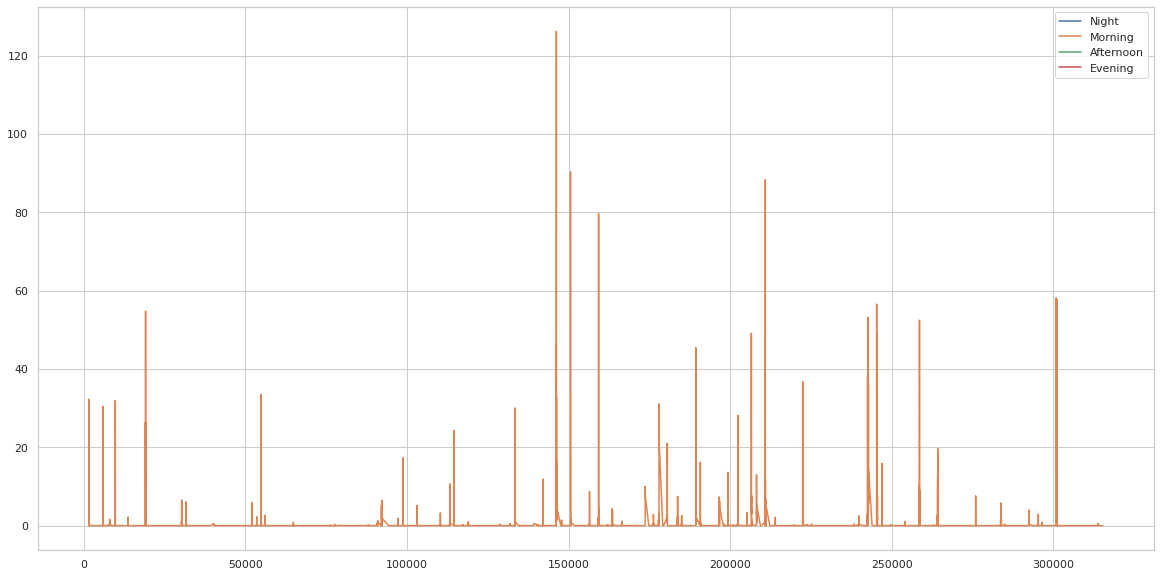

In [124]:
#Plotando a intensidade da chuva por anos

plt.figure(figsize=(20, 10))
df_rd80_joss.loc[df_rd80_joss.session == 'Morning'].groupby('session')['Rain_Intensity'].plot(legend=True)

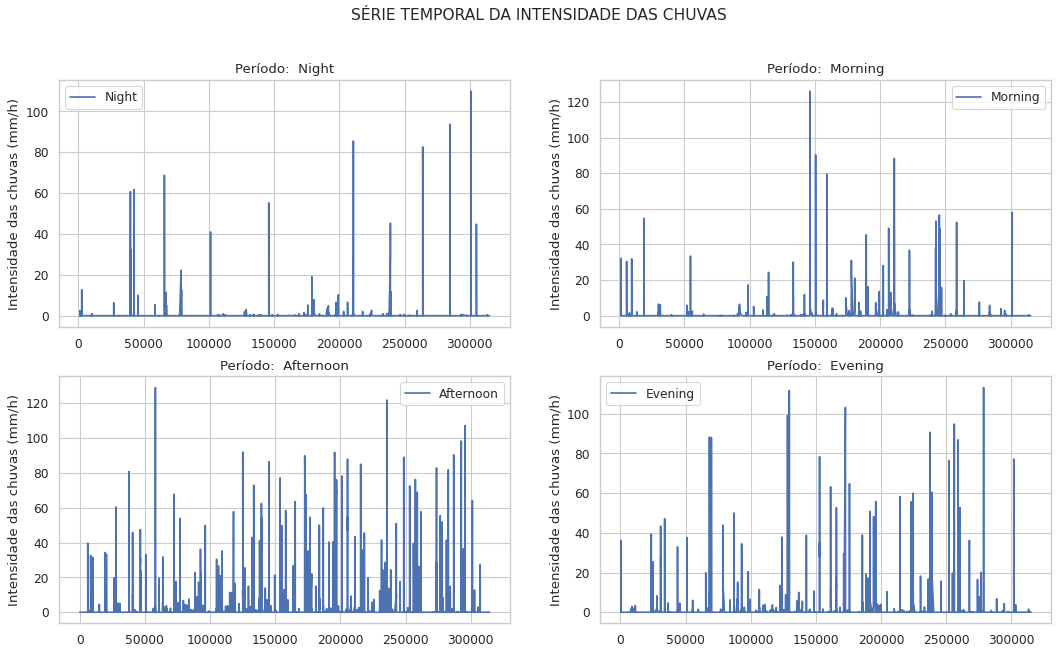

In [125]:
labels=['Night','Morning','Afternoon','Evening']

figure(figsize=(16,9),dpi=80)
plt.suptitle('SÉRIE TEMPORAL DA INTENSIDADE DAS CHUVAS', size=14)
for res in range(0,4):
    plt.subplot(2,2,res+1)
    plt.title('Período do dia:  '+labels[res])
    #plt.xlabel("")
    plt.ylabel("Intensidade das chuvas (mm/h)")
    plt.plot(df_rd80_joss.loc[df_rd80_joss.session == labels[res]]['Rain_Intensity'], label=labels[res])
    plt.legend()
plt.show()

Na célula abaixo iremos plotar a correlação entre as variáveis do **rd80**:

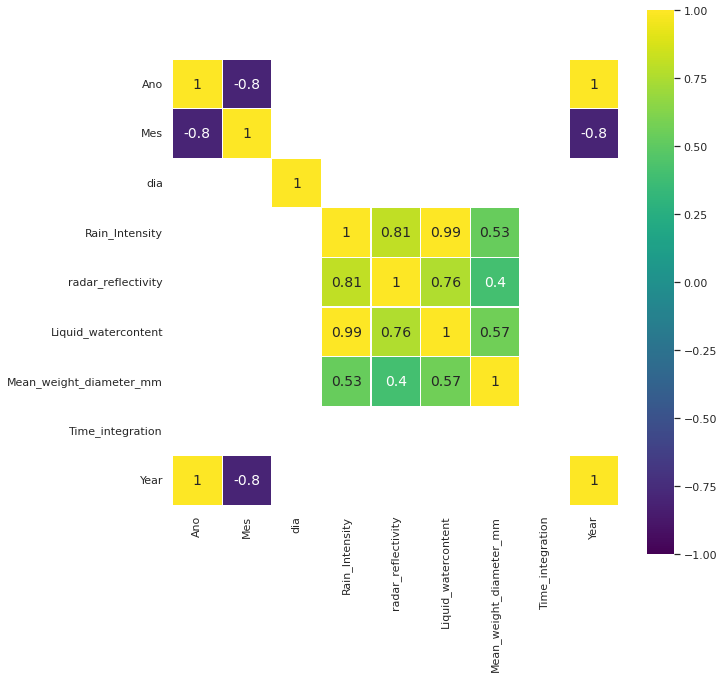

In [93]:
corr = df_rd80_joss.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 14}, square=True);

Rain Intensity (mm/h) X Mean weight diameter(mm)

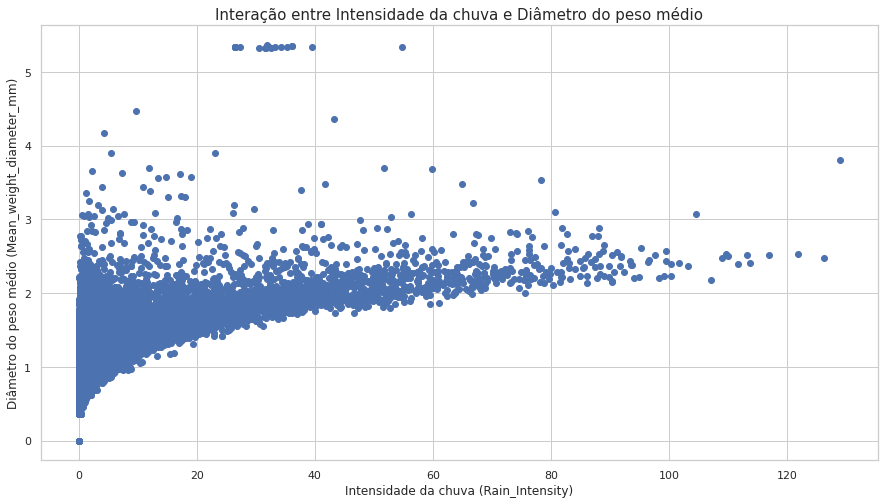

In [63]:
plt.figure(figsize=(15, 8))
plt.scatter(df_rd80_joss.Rain_Intensity, df_rd80_joss.Mean_weight_diameter_mm)
plt.title("Interação entre Intensidade da chuva e Diâmetro do peso médio", size=15)
plt.xlabel('Intensidade da chuva (Rain_Intensity)')
plt.ylabel('Diâmetro do peso médio (Mean_weight_diameter_mm)')
plt.show()

In [64]:
df_rd80_joss.isna().sum()

Datetime                   0
Ano                        0
Mes                        0
dia                        0
Rain_Intensity             0
radar_reflectivity         0
Liquid_watercontent        0
Mean_weight_diameter_mm    0
Time_integration           0
Date                       0
Year                       0
Month                      0
Day_of_week                0
Time                       0
session                    0
dtype: int64

In [65]:
df_rd80_joss.dropna(inplace=True)
df_rd80_joss.reset_index(inplace=True, drop=True)

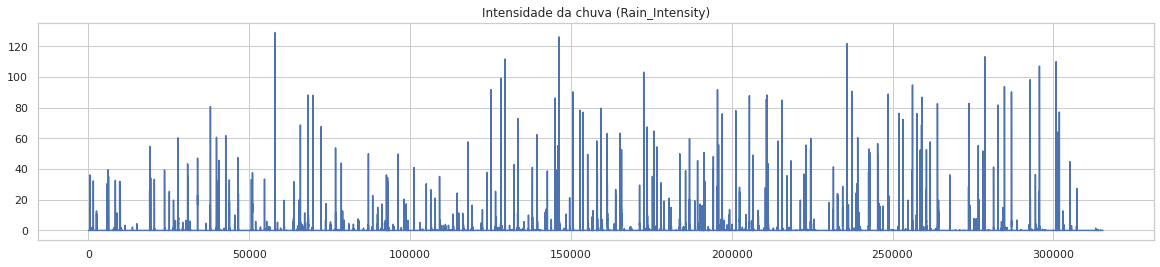

In [66]:
df_rd80_joss['Rain_Intensity'].plot(figsize = (20,4), title='Intensidade da chuva (Rain_Intensity)')

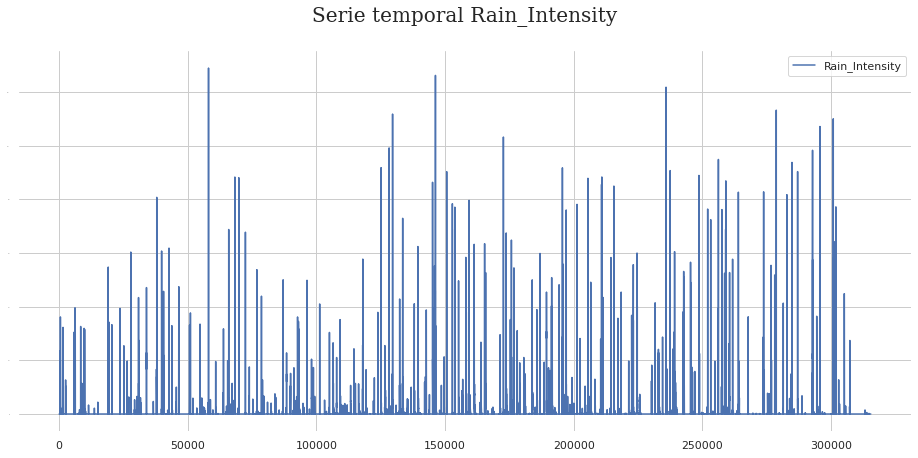

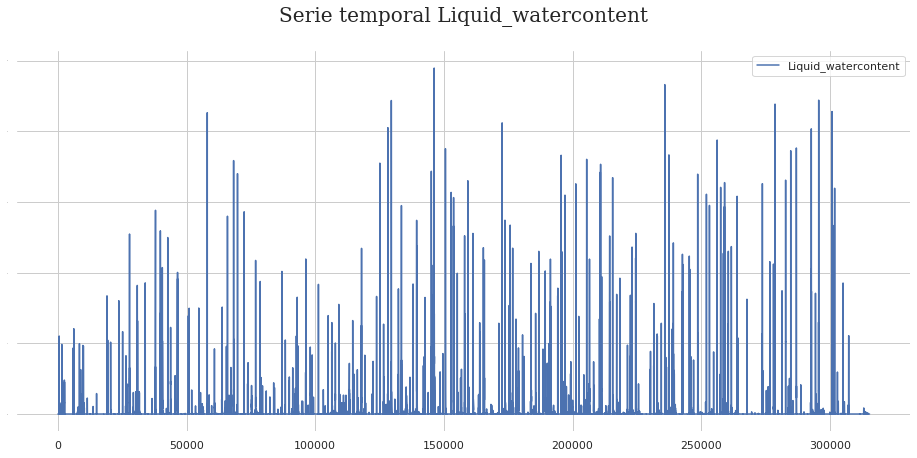

In [67]:
tickers = ['Rain_Intensity', 'Liquid_watercontent']

for i in tickers:
  df_rd80_joss[[i]].plot(figsize=(16,7), legend=True, label=i)
  plt.title('Serie temporal '+i+'\n', fontsize=20, fontfamily='serif')
  plt.box(False)
  plt.xticks(rotation=360, fontsize=11)
  plt.yticks(fontsize=0)
  plt.xlabel('')

# **References**

ROSE, T.; CREWELL, S.; LÖHNERT, U.; SIMMER, C. A network suitable microwave radiometer for operational monitoring of the cloudy atmosphere, Atmos. Res., 75, 183–200, 2005.

Tukey, John (1977). Exploratory Data Analysis. Addison-Wesley Publishing Company.